Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from systole.detection import ppg_peaks, interpolate_clipping, ecg_peaks
from systole.plots import plot_raw
from systole import import_dataset1, import_ppg
from systole.utils import heart_rate, to_epochs
from systole.hrv import frequency_domain

from IPython.display import Image
from IPython.core.display import HTML 

from bokeh.io import output_notebook
from bokeh.plotting import show
output_notebook()

sns.set_context('talk')

Loading BokehJS ...

# Photoplethysmography

In [7]:
ppg = import_ppg()

## Systolic peaks

## Clipping artefacts

Clipping is a form of distortion that can limit signal when it exceeds a certain threshold [see the Wikipedia page](https://en.wikipedia.org/wiki/Clipping_(signal_processing)). Some device can produce clipping artefacts when recording the PPG signal. Here, we can see that some clipping artefacts are found between 100 and 150 seconds in the previous recording. The threshold values (here `255`), is often set by the device and can easily be found. These artefacts should be corrected before systolic peaks detection. One way to go is to remove the portion of the signal where clipping artefacts occurs and use cubic spline interpolation to reconstruct a plausible estimate of the *real* underlying signal. This is what the function `interpolate_clipping()` do.

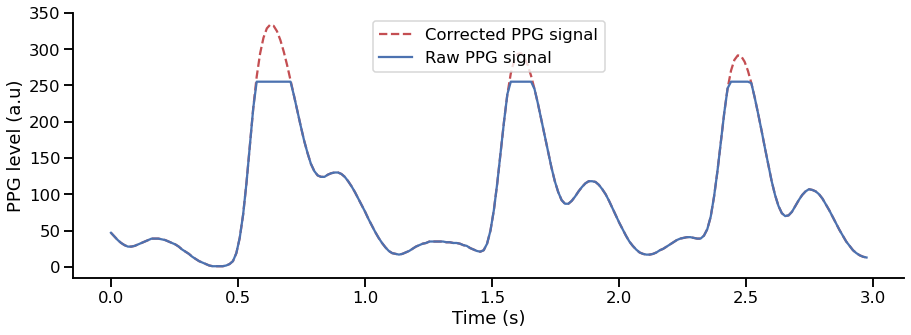

In [8]:
signal = ppg[(110 < ppg.time) & (ppg.time < 113)].ppg.to_numpy()  # Extract a portion of signal with clipping artefacts
clean_signal = interpolate_clipping(signal, threshold=255)  # Remove clipping segment and interpolate missing calues

sns.set_context('talk')
plt.figure(figsize=(13, 5))
plt.plot(np.arange(0, len(clean_signal))/75, clean_signal, label='Corrected PPG signal', linestyle= '--', color='#c44e52')
plt.plot(np.arange(0, len(signal))/75, signal, label='Raw PPG signal', color='#4c72b0')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('PPG level (a.u)')
sns.despine()
plt.tight_layout()

# Electrocardiography

In [9]:
# Import ECg recording
ecg_df = import_dataset1(modalities=['ECG'])
signal = ecg_df.ecg.to_numpy()

## Detecting R peaks
Remember the ECG cycles (image)
The main approach is to find R peaks to compute RR intervals.
Large variety of algorithms
Here, we will focus on the following methods: hamilton, christov, engelse-zeelenberg, pan-tompkins, wavelet-transform, moving-average.
Comes from the py-ecg-detectors module
Add numba support, which speed up the code (7-30x faster)

In [10]:
from systole.detectors import pan_tompkins

### Pan-Tompkins

Very popular, maybe to most popular, method for R peaks detection.

In [11]:
# R peaks detection
peaks = pan_tompkins(signal, sfreq=1000)

### Wavelet transform

### Hamilton

### Christov

### Engelse-Zeelenberg